# Newtons Metode


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Codeniksson/MATH4SDG/blob/main/02-math102/2-Newtons_metode.ipynb)

Mål: løs ligninger på formen $f(x) = 0$ for en funksjon $f \colon \mathbb{R} \to \mathbb{R}$. Se kapittel 2 i [kompendiet](https://mitt.uib.no/courses/45603/files?preview=5619281) for mere om dette. 

In [1]:
# Her importeres en quizz modul for jupyter.
# Hvis den ikke allerede er installert blir den installert.
try:
  from jupyterquiz import display_quiz
except:
  !pip install jupyterquiz
  from jupyterquiz import display_quiz

## Eksempel

<p>
<font color='DarkGreen'>
Jeg skrev følgende til Gemini:
</font>
</p>

<p><font color='DarkBlue'>
In python, use Newton's method to solve exp(x) + 2*x = 0.
</font>
</p>

<p>
<font color='DarkGreen'>
Her er svaret jeg fikk.
</font>
</p>



```python
import math

def f(x):
    """The function we want to find the root of."""
    return math.exp(x) + 2 * x

def df(x):
    """The derivative of f(x)."""
    return math.exp(x) + 2

def newton_raphson(initial_guess, tolerance=1e-6, max_iterations=100):
    """
    Finds a root of f(x) = 0 using the Newton-Raphson method.

    Args:
        initial_guess: The initial guess for the root.
        tolerance: The desired accuracy.
        max_iterations: The maximum number of iterations.

    Returns:
        The approximate root, or None if the method fails to converge.
    """
    x = initial_guess
    for _ in range(max_iterations):
        fx = f(x)
        dfx = df(x)

        if abs(dfx) < 1e-10: #avoid division by zero or very small values
            print("Derivative close to zero. Newton-Raphson may fail.")
            return None
        
        next_x = x - fx / dfx

        if abs(next_x - x) < tolerance:
            return next_x
        x = next_x
    print("Newton-Raphson did not converge within the maximum number of iterations.")
    return None

# Example usage:
initial_guess = -1  # A reasonable starting point
root = newton_raphson(initial_guess)

if root is not None:
    print(f"Approximate root: {root}")
    print(f"f(root): {f(root)}") # Check the value of the function at the root
else:
    print("Root finding failed.")


initial_guess = 0 # Example where derivative is not a problem
root = newton_raphson(initial_guess)

if root is not None:
    print(f"Approximate root: {root}")
    print(f"f(root): {f(root)}") # Check the value of the function at the root
else:
    print("Root finding failed.")

```

Key improvements in this version:

*   **Derivative Check:** Added a check for a derivative close to zero (`abs(dfx) < 1e-10`). This prevents division by zero or very small numbers, which can lead to numerical instability and errors. It also prints a message to warn the user if this situation occurs.
*   **Convergence Check:** The convergence check is now `abs(next_x - x) < tolerance`, which is a more robust way to check for convergence than checking `abs(f(x))`. This checks if the change in x is small, rather than if the function value is small.
*   **Maximum Iterations:** Includes a `max_iterations` parameter to prevent infinite loops if the method doesn't converge. It prints a message if the maximum iterations are reached without convergence.
*   **Clearer Comments and Docstrings:** Improved the comments and docstrings to explain the code more clearly.
*   **Example Usages:** Added more examples to demonstrate usage and edge cases, including a case where the derivative is not close to zero.
*   **Function value check:** Included a check for the function value at the found root, which helps verify the solution.

This improved version is more robust and provides better feedback to the user. It addresses the potential issues of division by zero and non-convergence, making it more reliable for finding roots using Newton's method.


<p>
<font color='DarkGreen'>
Dette svaret var litt langt og vanskelig å forstå, så jeg spurte om å få en enklere versjon:
</font>
</p>


<font color='DarkBlue'>
Please give me a more basic version.
</font>

```python
import numpy as np

def f(x):
    """The function we want to find the root of."""
    return np.exp(x) + 2 * x

def df(x):
    """The derivative of f(x)."""
    return np.exp(x) + 2

def newton_raphson(initial_guess):
    """
    Finds a root of f(x) = 0 using the Newton-Raphson method.

    Args:
        initial_guess: The initial guess for the root.

    Returns:
        The approximate root.
    """
    x = initial_guess
    for _ in range(100):  # Iterate a fixed number of times (max 100)
        x = x - f(x) / df(x)  # The core Newton-Raphson formula
    return x

# Example usage:
initial_guess = -1
root = newton_raphson(initial_guess)
print(f"Approximate root: {root}")
print(f"f(root): {f(root)}")

initial_guess = 0
root = newton_raphson(initial_guess)
print(f"Approximate root: {root}")
print(f"f(root): {f(root)}")

```

Key simplifications:

*   **Fixed Iterations:** Instead of checking for convergence using a tolerance, the loop now runs a fixed number of times (100). This is simpler but less robust, as it might not converge to the desired accuracy or might waste iterations if it converges quickly.
*   **Removed Checks:** The checks for division by zero and maximum iterations have been removed for simplicity. This makes the code shorter but also less robust, as it could lead to errors or infinite loops in certain cases.
*   **Simplified Docstrings and Comments:** The docstrings and comments have been simplified to focus on the essential information.

This version is much more basic and easier to understand, but it sacrifices robustness and accuracy checks. It's suitable for learning the core concept of Newton's method but not recommended for production code where reliability is important. It is important to note that without the check for division by zero, the code may run into a `ZeroDivisionError` if `df(x)` evaluates to zero.


<p>
<font color='DarkGreen'>
Jeg kopierte ut koden og så om den kjører:
</font>
</p>



In [2]:
import numpy as np

def f(x):
    """The function we want to find the root of."""
    return np.exp(x) + 2 * x

def df(x):
    """The derivative of f(x)."""
    return np.exp(x) + 2

def newton_raphson(initial_guess):
    """
    Finds a root of f(x) = 0 using the Newton-Raphson method.

    Args:
        initial_guess: The initial guess for the root.

    Returns:
        The approximate root.
    """
    x = initial_guess
    for _ in range(100):  # Iterate a fixed number of times (max 100)
        x = x - f(x) / df(x)  # The core Newton-Raphson formula
    return x

# Example usage:
initial_guess = -1
root = newton_raphson(initial_guess)
print(f"Approximate root: {root}")
print(f"f(root): {f(root)}")

initial_guess = 0
root = newton_raphson(initial_guess)
print(f"Approximate root: {root}")
print(f"f(root): {f(root)}")

Approximate root: -0.35173371124919584
f(root): 0.0
Approximate root: -0.35173371124919584
f(root): 0.0


## Visualisering

Det er ofte hjelpsomt å tegne grafen til funksjonen $f$. La oss gjøre det på en enkel måte. Du kan gjerne forbedre figuren slik at den har koordinatakser, tittel og xlabel og ylabel.

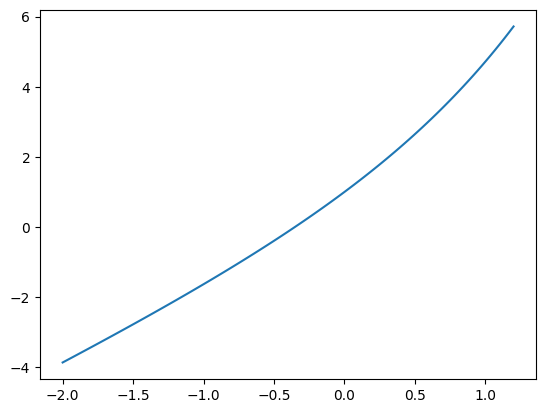

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 1.2, 100)
y = f(x)
plt.plot(x, y);

## Forklaring

Metoden til Newton er ganske godt forklart på den engelske [Wikipedia siden Newton's Method](https://en.wikipedia.org/wiki/Newton's_method).
La oss si at vi gjetter på at $x_n$ er en løsning til ligningen $f(x) = 0$. Vi ønsker å forbedre gjettet.

![Newtons Metode](Newton_iteration.svg)

Ligningen til den røde linjen er $y(x) = f'(x_n)(x - x_n) + f(x_n)$. Tallet $x_{n+1}$ er slik at $y(x_{n+1}) = 0$. 


**Forklar til personen ved siden av deg hvorfor $x_{n+1} = x_n - \frac{f(n_n)}{f'(x_n)}$ gir $y(x_{n+1}) = 0$.**

Hvorfor tror du $x_{n+1}$ er et bedre gjett enn $x_n$ på en løsning til ligningen $f(x) = 0?$

Starter vi med en initialverdi $x_0$ kan vi spørre om hva det er for tall $x_1, x_2, \dots$ som blir generert i Newtons metode, og hva funksjonsverdiene til disse tallene er. For å se dette kan vi endre litt på koden. Jeg endrer koden over slik at jeg kan bruke den om igjen for en ny funksjon senere.

In [4]:
def newton_formel(x, funksjon, derivert):
    """
    Anvender Newtons formel for en funksjon og 
    den deriverte funksjonen på en verdi x.

    Args:
        x: verdien vi vil anvende Newtons formel på
        funksjon: funksjonen vi vil bruke
        derivert: den deriverte funksjon til funksjonen vi vil bruke

    Returns:
        Resultatet av Newtons formel anvendt på x
    """
    return x - funksjon(x) / derivert(x)

def newton_rapson_liste(x_initial, funksjon, derivert, antall_iterasjoner=10):
    """
    Finner en rot til funksjonen funksjon(x) ved hjelp av Newton sin metode

    Args:
        x_initial: første gjett på en rot til funksjonen kalt funksjon
        funksjon: funksjonen vi vil bruke
        derivert: den deriverte funksjon til funksjonen vi vil bruke

    Returns:
       En numpy array med alle gjett på verdien til x som ble gjort i algoritmen 
    """
    xer = [x_initial]
    for _ in range(antall_iterasjoner):
        xer.append(newton_formel(xer[-1], funksjon, derivert))
    return np.array(xer)      

In [5]:
x_0 = 0
xx = newton_rapson_liste(x_initial=x_0, funksjon=f, derivert=df, antall_iterasjoner=10)

Vi kan nå lage figurer av hvordan gjettene på røtter ser ut.

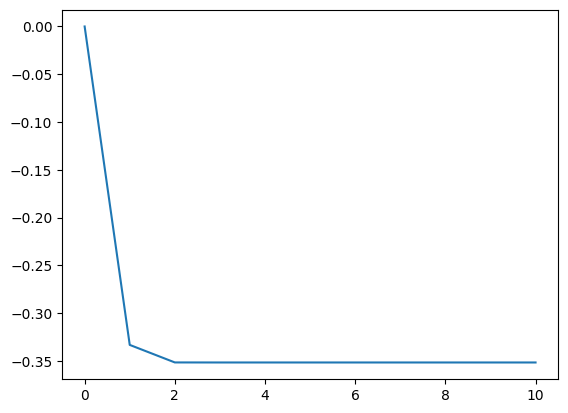

In [6]:
plt.plot(xx)

Vi kan også lage figurer av hvordan funksjonsverdiene til gjettene på røtter ser ut.

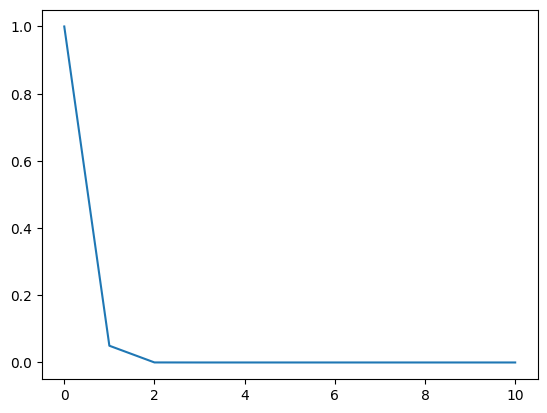

In [7]:
plt.plot(f(xx))

### Oppgave

**For funksjonen $f(x) = exp(x) + 2*x$, start med et gjett $x_0 = 0$ på en løsning til ligningen $f(x) = 0?$
Modifiser koden over til å finne $x_1$, $x_2$ og $x_3$**

In [8]:
# lenke til quizspørsmål
git_path="https://raw.githubusercontent.com/mbr085/V25MAT102/main/notebooks/uke3/"

In [9]:
display_quiz(git_path+"k2_1.json")

<IPython.core.display.Javascript object>

## Skjæring, kontinuitet og Newtons metode

En typisk oppgave om Newtons metode består i å forklare hvorfor vi kan være sikre på at en funksjon
har et nullpunkt, og deretter bruke Newtons metode til å prøve å finne det.

Eksempel

**Se på funksjonen f(x) = exp(x) + 2*x.**

**Forklar hvorfor funksjonen har et nullpunkt i intervallet (−1, 0), og bruk Newtons metode til å finne
nullpunktet.**


Dette er den funksjonen vi allerede har jobbet med, så vi har allerede funnet nullpunkt for den.

For å se om den har et nullpunkt i intervallet $(-1,0)$ ser vi på funksjonsverdiene i endepunktene:

In [10]:
f(-1), f(0)

(np.float64(-1.6321205588285577), np.float64(1.0))

Vi ser at funksjonen $f$ har forskjellig fortegn i endepunktene. Siden $f$ er kontinuerlig gir skjæringssetningen (MIP teorem 4.3.1) at $f$ har et nullpunkt i intervallet.

### Oppgave

**Se på ligningen** 2*cos(x) = x.

**Forklar hvorfor ligningen har en løsning i intervallet (0,2), og bruk Newtons metode til å finne løsningen.**  

**Tegn også en figur som illustrerer dette**

## Advarsel:

Ting kan gå galt. Selv om et nullpunkt finnes kan metoden til Newton feile. Det er mye å si om dette. Det står litt om dette i kompendiet.

## Å finne røtter med scipy

Det er [metoder i pakken `scipy` som finner røtter til funksjoner.](https://docs.scipy.org/doc/scipy-1.15.0/reference/optimize.html#root-finding) 
La oss se hvordan vi kan bruke metoden til Newton hentet derfra.

In [11]:
from scipy.optimize import newton

Vi blir fortalt dette om den newton funksjonen

`newton(func, x0[, fprime, args, tol, ...])`

Vi forsøker å bruke metoden.

In [12]:
newton(f, 1, df)

np.float64(-0.3517337112491958)

Det virket som om vi ikke trenger å angi den deriverte funksjonen til funksjonen f. Er det virkelig sant?

In [13]:
newton(f, 1)

np.float64(-0.35173371124919584)